The following code creates the simulated group interactions presented in "Expectations and Coordination in Small Groups".

The code creates a group of agents, and has them randomly play a 1-on-1 game vs one another. The success of the group is determined by the collective scores of the games.

Agents play this game in accordance with a set of pre-determined rules. These rules reflect certain axioms from expectation states theory, a theoretical reseach program within the sociological social psychology literature.

Agents rules are hardwired, not rationally optimizing. As such, we are not interested in individual payoffs, only collective payoffs, in this paper.

In [ ]:
####Import Modules
import re
import time
import networkx as nx
import matplotlib.pyplot as plt
import operator
import random
import numpy
import math

In [2]:
####Define Class for Agents in the Simulation
#Each agent is able to posess two attributes:
#power - which is their likelihood of winning a conflict
#ability - which is their contribution (the total payoff) if they lead
#Each agent posseses a dictionary to store expectations about other agents.
#Each agent posseses a string - stoch_automata -  that defines how they will form these expectations
#Each agent has resources, which start at 0.
#two methods exist, one to update it's resource total, another to update it's exepctations

#char is a 0 or 1 flag - it is not useful yet - but may be useful if status
#characteristics are introduced to the model.
class Agent:
	def __init__(self,ID,ability,power,char,stoch_automata,other_agents):
		self.ID = ID
		self.ability = ability
		self.power = power
		self.states = {}
		self.other_agents = other_agents
		for x in other_agents:
			self.states[x] = -1
		self.char = char	
		self.automata = stoch_automata
		self.resources = 0
	def resource_change(self,amount):
		self.resources = self.resources + amount
	def change_state(self,prob,other,candidate = -1):
		if candidate == -1:
			if self.states[other]==0:
				if random.random() < prob:
					self.states[other]=1
				else:
					pass
			else:
				if random.random() < prob:
					self.states[other]=0
				else:
					pass
		else:
			if random.random() < prob:
				self.states[other] = candidate
			else:
				pass

In [4]:
#"game" is a function that takes two individuals and has them intereact
#in a game that varies from hawk/dove to battle of the sexes -roughly- based on the parameters set.  Specificailly - a high Conflict_Cost will turn this into a h/d. 
#the behavior of each agent is determined by their expectation of their opponent.
#Leader_Share varies from 0 to 1, 0.5 means a successful coordination is split equally. 1 means the leader takes all.
#Bystanders is a list of people watching the game - who are updating their expectations.
#Det determines how likely the higher power agent will win, high values effectively
#guarantee that the higher power agent wins in all situations.
#abil_enh can be used to enhance the relative payoffs for the high-ability agent leading as opposed to the low_ability agent
#The function returns what happens in the game, the collective payoff, and the outcome type.
#The agent methods in the function alter the agents' resource amounts and expectations.
def game(Agent1,Agent2,Leader_Share,Conflict_Cost,Bystanders,det = 1,abil_enh = 1):
	###Assgn Behaviors to People with Initial States:
	if Agent1.states[Agent2.ID] == -1:
		if random.random() <Agent1.automata[0]:
			A1Behavior = 1
		else:
			A1Behavior = 0
	else:
		A1Behavior = Agent1.states[Agent2.ID]
	if Agent2.states[Agent1.ID] == -1:
		if random.random() <Agent1.automata[0]:
			A2Behavior = 1
		else:
			A2Behavior = 0
	else:
		A2Behavior = Agent2.states[Agent1.ID]
	###Agent 1 Dominates Agent 2####
	if (A1Behavior == 1) & (A2Behavior ==0):
		Agent1.resource_change(Leader_Share * Agent1.ability**abil_enh)
		Agent2.resource_change((1 - Leader_Share)*Agent1.ability**abil_enh)
		if Agent1.states[Agent2.ID] == 0:
			pass
		elif Agent1.states[Agent2.ID] == 1:
			Agent1.change_state(Agent1.automata[3],Agent2.ID)
		else:
			Agent1.change_state(Agent1.automata[6],Agent2.ID,1)
		if Agent2.states[Agent1.ID] == 0:
			Agent2.change_state(Agent2.automata[1],Agent1.ID)
		elif Agent2.states[Agent1.ID]==-1:
			Agent2.change_state(Agent2.automata[7],Agent1.ID,0)
		else:
			pass
		for y in Bystanders:
			###Winner/Loser Effects
			if Agent1.states[y.ID]==0:
				Agent1.change_state(Agent1.automata[11],y.ID)
			elif Agent1.states[y.ID]==1:
				Agent1.change_state(Agent1.automata[16],y.ID)
			else:
				Agent1.change_state(Agent1.automata[21],y.ID,1)
			if Agent2.states[y.ID]==0:
				Agent2.change_state(Agent2.automata[12],y.ID)
			elif Agent2.states[y.ID]==1:
				Agent2.change_state(Agent2.automata[17],y.ID)
			else:
				Agent2.change_state(Agent2.automata[22],y.ID,0)
			###Bystander Effects
			if (y.states[Agent1.ID]==0) & (y.states[Agent2.ID] ==0):
				y.change_state(y.automata[26],Agent1.ID) #26-30
				y.change_state(y.automata[27],Agent2.ID) #26-30
			elif (y.states[Agent1.ID]==0) & (y.states[Agent2.ID] ==1):
				y.change_state(y.automata[31],Agent1.ID) #31-35
				y.change_state(y.automata[42],Agent2.ID) #41-45
			elif (y.states[Agent1.ID]==0) & (y.states[Agent2.ID] ==-1):
				y.change_state(y.automata[36],Agent1.ID) #36-40
				y.change_state(y.automata[57],Agent2.ID,1) #56-60
			elif (y.states[Agent1.ID]==1) & (y.states[Agent2.ID] ==0):
				y.change_state(y.automata[41],Agent1.ID) #41-45
				y.change_state(y.automata[32],Agent2.ID) #31-35		
			elif (y.states[Agent1.ID]==1) & (y.states[Agent2.ID] ==1):
				y.change_state(y.automata[46],Agent1.ID) #46-50
				y.change_state(y.automata[47],Agent2.ID) #46-50
			elif (y.states[Agent1.ID]==1) & (y.states[Agent2.ID] ==-1):
				y.change_state(y.automata[51],Agent1.ID) #51-55
				y.change_state(y.automata[62],Agent2.ID,1) #61-65
			elif (y.states[Agent1.ID]==-1) & (y.states[Agent2.ID] ==0):
				y.change_state(y.automata[56],Agent1.ID,0) #56-60
				y.change_state(y.automata[37],Agent2.ID) #36-40		
			elif (y.states[Agent1.ID]==-1) & (y.states[Agent2.ID] ==1):
				y.change_state(y.automata[61],Agent1.ID,0) #61-65
				y.change_state(y.automata[52],Agent2.ID) #51-55
			else:
				y.change_state(y.automata[66],Agent1.ID,0) #66-70
				y.change_state(y.automata[67],Agent2.ID,1) #66-70
		Outcome =  str(Agent1.ID) + "Leads" + str(Agent2.ID)
		if Agent1.ability > Agent2.ability:
			OutcomeType = 0
		else:
			OutcomeType = 3
		Coll_Outcome = Agent1.ability
	###Agent 2 Dominates Agent 1###
	elif (A1Behavior == 0) & (A2Behavior ==1):
		Agent1.resource_change(Leader_Share * Agent2.ability**abil_enh)
		Agent2.resource_change((1 - Leader_Share)*Agent2.ability**abil_enh)
		if Agent1.states[Agent2.ID] == 0:
			Agent1.change_state(Agent1.automata[1],Agent2.ID)
		elif Agent1.states[Agent2.ID] == 1:
			pass
		else:
			Agent1.change_state(Agent1.automata[7],Agent2.ID,0)
		if Agent2.states[Agent1.ID] == 0:
			pass
		elif Agent2.states[Agent1.ID]==1:
			Agent2.change_state(Agent2.automata[3],Agent1.ID)
		else:
			Agent2.change_state(Agent2.automata[6],Agent1.ID,0)
		for y in Bystanders:
			###Winner/Loser Effects
			if Agent1.states[y.ID]==0:
				Agent1.change_state(Agent1.automata[12],y.ID)
			elif Agent1.states[y.ID]==1:
				Agent1.change_state(Agent1.automata[17],y.ID)
			else:
				Agent1.change_state(Agent1.automata[22],y.ID,0)
			if Agent2.states[y.ID]==0:
				Agent2.change_state(Agent2.automata[11],y.ID)
			elif Agent2.states[y.ID]==1:
				Agent2.change_state(Agent2.automata[16],y.ID)
			else:
				Agent2.change_state(Agent2.automata[21],y.ID,1)
			###Bystander Effects			
			if (y.states[Agent1.ID]==0) & (y.states[Agent2.ID] ==0):
				y.change_state(y.automata[27],Agent1.ID) #26-30
				y.change_state(y.automata[26],Agent2.ID) #26-30
			elif (y.states[Agent1.ID]==0) & (y.states[Agent2.ID] ==1):
				y.change_state(y.automata[32],Agent1.ID) #31-35
				y.change_state(y.automata[41],Agent2.ID) #41-45
			elif (y.states[Agent1.ID]==0) & (y.states[Agent2.ID] ==-1):
				y.change_state(y.automata[37],Agent1.ID) #36-40
				y.change_state(y.automata[56],Agent2.ID,0) #56-60
			elif (y.states[Agent1.ID]==1) & (y.states[Agent2.ID] ==0):
				y.change_state(y.automata[42],Agent1.ID) #41-45
				y.change_state(y.automata[31],Agent2.ID) #31-35		
			elif (y.states[Agent1.ID]==1) & (y.states[Agent2.ID] ==1):
				y.change_state(y.automata[47],Agent1.ID) #46-50
				y.change_state(y.automata[46],Agent2.ID) #46-50
			elif (y.states[Agent1.ID]==1) & (y.states[Agent2.ID] ==-1):
				y.change_state(y.automata[52],Agent1.ID) #51-55
				y.change_state(y.automata[61],Agent2.ID,0) #61-65
			elif (y.states[Agent1.ID]==-1) & (y.states[Agent2.ID] ==0):
				y.change_state(y.automata[57],Agent1.ID,1) #56-60
				y.change_state(y.automata[36],Agent2.ID) #36-40		
			elif (y.states[Agent1.ID]==-1) & (y.states[Agent2.ID] ==1):
				y.change_state(y.automata[62],Agent1.ID,1) #61-65
				y.change_state(y.automata[51],Agent2.ID) #51-55
			else:
				y.change_state(y.automata[67],Agent1.ID,1) #66-70
				y.change_state(y.automata[66],Agent2.ID,0) #66-70
		Outcome = str(Agent2.ID) + "Leads" + str(Agent1.ID)
		if Agent2.ability > Agent1.ability:
			OutcomeType = 0
		else:
			OutcomeType = 3
		Coll_Outcome = Agent2.ability
	###Neither Dominate####
	elif (A1Behavior== 0) & (A2Behavior ==0):
		if Agent1.states[Agent2.ID] == 0:
			Agent1.change_state(Agent1.automata[2],Agent2.ID)
		elif Agent1.states[Agent2.ID] == 1: 
			pass
		else:
			Agent1.change_state(Agent1.automata[8],Agent2.ID,1)
		if Agent2.states[Agent1.ID] == 0:
			Agent2.change_state(Agent2.automata[2],Agent1.ID)
		elif Agent2.states[Agent1.ID] == 1:
			pass
		else:
			Agent2.change_state(Agent2.automata[8],Agent1.ID,1)
		for y in Bystanders:
			###Winner/Loser Effects
			if Agent1.states[y.ID]==0:
				Agent1.change_state(Agent1.automata[13],y.ID)
			elif Agent1.states[y.ID]==1:
				Agent1.change_state(Agent1.automata[18],y.ID)
			else:
				Agent1.change_state(Agent1.automata[23],y.ID,1)
			if Agent2.states[y.ID]==0:
				Agent2.change_state(Agent2.automata[13],y.ID)
			elif Agent2.states[y.ID]==-1 :
				Agent2.change_state(Agent2.automata[18],y.ID)
			else:
				Agent2.change_state(Agent2.automata[23],y.ID,1)
			###Bystander Effects
			if (y.states[Agent1.ID]==0) & (y.states[Agent2.ID] ==0):
				y.change_state(y.automata[28],Agent1.ID) #26-30
				y.change_state(y.automata[28],Agent2.ID) #26-30
			elif (y.states[Agent1.ID]==0) & (y.states[Agent2.ID] ==1):
				y.change_state(y.automata[33],Agent1.ID) #31-35
				y.change_state(y.automata[43],Agent2.ID) #41-45
			elif (y.states[Agent1.ID]==0) & (y.states[Agent2.ID] ==-1):
				y.change_state(y.automata[38],Agent1.ID) #36-40
				y.change_state(y.automata[58],Agent2.ID,1) #56-60
			elif (y.states[Agent1.ID]==1) & (y.states[Agent2.ID] ==0):
				y.change_state(y.automata[43],Agent1.ID) #41-45
				y.change_state(y.automata[33],Agent2.ID) #31-35		
			elif (y.states[Agent1.ID]==1) & (y.states[Agent2.ID] ==1):
				y.change_state(y.automata[48],Agent1.ID) #46-50
				y.change_state(y.automata[48],Agent2.ID) #46-50
			elif (y.states[Agent1.ID]==1) & (y.states[Agent2.ID] ==-1):
				y.change_state(y.automata[53],Agent1.ID) #51-55
				y.change_state(y.automata[63],Agent2.ID,1) #61-65
			elif (y.states[Agent1.ID]==-1) & (y.states[Agent2.ID] ==0):
				y.change_state(y.automata[58],Agent1.ID,1) #56-60
				y.change_state(y.automata[38],Agent2.ID) #36-40		
			elif (y.states[Agent1.ID]==-1) & (y.states[Agent2.ID] ==1):
				y.change_state(y.automata[63],Agent1.ID,1) #61-65
				y.change_state(y.automata[53],Agent2.ID) #51-55
			else:
				y.change_state(y.automata[68],Agent1.ID,1) #66-70
				y.change_state(y.automata[68],Agent2.ID,1) #66-70
		Outcome =  str(Agent2.ID) +str(Agent1.ID) + "Both defer"
		OutcomeType = 1
		Coll_Outcome = 0
	else:
		###Agent1 Defeats Agent2####
		if random.random() < Agent1.power**det/(Agent1.power**det+Agent2.power**det):
			Agent2.resource_change(-Conflict_Cost)
			if Agent1.states[Agent2.ID] == 0:
				pass
			elif Agent1.states[Agent2.ID] == 1:
				Agent1.change_state(Agent1.automata[4],Agent2.ID)
			else:
				Agent1.change_state(Agent1.automata[9],Agent2.ID,1)
			if Agent2.states[Agent1.ID] == 0:
				pass
			elif Agent2.states[Agent1.ID] == 1:
				Agent2.change_state(Agent2.automata[5],Agent1.ID)
			else:
				Agent2.change_state(Agent2.automata[10],Agent1.ID,0)
			for y in Bystanders:
				###Winner/Loser Effects
				if Agent1.states[y.ID]==0:
					Agent1.change_state(Agent1.automata[14],y.ID)
				elif Agent1.states[y.ID]==1:
					Agent1.change_state(Agent1.automata[19],y.ID)
				else:
					Agent1.change_state(Agent1.automata[24],y.ID,1)
				if Agent2.states[y.ID]==0:
					Agent2.change_state(Agent2.automata[15],y.ID)
				elif Agent2.states[y.ID]==1:
					Agent2.change_state(Agent2.automata[20],y.ID)
				else:
					Agent2.change_state(Agent2.automata[25],y.ID,0)
				###Bystander Effects
				if (y.states[Agent1.ID]==0) & (y.states[Agent2.ID] ==0):
					y.change_state(y.automata[29],Agent1.ID) #26-30
					y.change_state(y.automata[30],Agent2.ID) #26-30
				elif (y.states[Agent1.ID]==0) & (y.states[Agent2.ID] ==1):
					y.change_state(y.automata[34],Agent1.ID) #31-35
					y.change_state(y.automata[45],Agent2.ID) #41-45
				elif (y.states[Agent1.ID]==0) & (y.states[Agent2.ID] ==-1):
					y.change_state(y.automata[39],Agent1.ID) #36-40
					y.change_state(y.automata[60],Agent2.ID,1) #56-60
				elif (y.states[Agent1.ID]==1) & (y.states[Agent2.ID] ==0):
					y.change_state(y.automata[44],Agent1.ID) #41-45
					y.change_state(y.automata[35],Agent2.ID) #31-35		
				elif (y.states[Agent1.ID]==1) & (y.states[Agent2.ID] ==1):
					y.change_state(y.automata[49],Agent1.ID) #46-50
					y.change_state(y.automata[50],Agent2.ID) #46-50
				elif (y.states[Agent1.ID]==1) & (y.states[Agent2.ID] ==-1):
					y.change_state(y.automata[54],Agent1.ID) #51-55
					y.change_state(y.automata[65],Agent2.ID,1) #61-65
				elif (y.states[Agent1.ID]==-1) & (y.states[Agent2.ID] ==0):
					y.change_state(y.automata[59],Agent1.ID,0) #56-60
					y.change_state(y.automata[40],Agent2.ID) #36-40		
				elif (y.states[Agent1.ID]==-1) & (y.states[Agent2.ID] ==1):
					y.change_state(y.automata[64],Agent1.ID,0) #61-65
					y.change_state(y.automata[55],Agent2.ID) #51-55
				else:
					y.change_state(y.automata[69],Agent1.ID,0) #66-70
					y.change_state(y.automata[70],Agent2.ID,1) #66-70
			Outcome = str(Agent1.ID) + "Defeats" + str(Agent2.ID)
			OutcomeType = 2
			Coll_Outcome = -Conflict_Cost
		###Agent 2 Defeats Agent 1####
		else:
			Agent1.resource_change(-Conflict_Cost)
			if Agent1.states[Agent2.ID] == 0:
				pass
			elif Agent1.states[Agent2.ID] == 1:
				Agent1.change_state(Agent1.automata[5],Agent2.ID)
			else:
				Agent1.change_state(Agent1.automata[10],Agent2.ID,0)
			if Agent2.states[Agent1.ID] == 0:
				pass
			elif Agent2.states[Agent1.ID] == 1:
				Agent2.change_state(Agent2.automata[4],Agent1.ID)
			else:
				Agent2.change_state(Agent2.automata[9],Agent1.ID,1)
			for y in Bystanders:
				###Winner/Loser Effects
				if Agent1.states[y.ID]==0:
					Agent1.change_state(Agent1.automata[15],y.ID)
				elif Agent1.states[y.ID]==1:
					Agent1.change_state(Agent1.automata[20],y.ID)
				else:
					Agent1.change_state(Agent1.automata[25],y.ID,0)
				if Agent2.states[y.ID]==0:
					Agent2.change_state(Agent2.automata[14],y.ID)
				elif Agent2.states[y.ID]==1:
					Agent2.change_state(Agent2.automata[19],y.ID)
				else:
					Agent2.change_state(Agent2.automata[24],y.ID,1)
				###Bystander Effects
				if (y.states[Agent1.ID]==0) & (y.states[Agent2.ID] ==0):
					y.change_state(y.automata[30],Agent1.ID) #26-30
					y.change_state(y.automata[29],Agent2.ID) #26-30
				elif (y.states[Agent1.ID]==0) & (y.states[Agent2.ID] ==1):
					y.change_state(y.automata[35],Agent1.ID) #31-35
					y.change_state(y.automata[44],Agent2.ID) #41-45
				elif (y.states[Agent1.ID]==0) & (y.states[Agent2.ID] ==-1):
					y.change_state(y.automata[40],Agent1.ID) #36-40
					y.change_state(y.automata[59],Agent2.ID,0) #56-60
				elif (y.states[Agent1.ID]==1) & (y.states[Agent2.ID] ==0):
					y.change_state(y.automata[45],Agent1.ID) #41-45
					y.change_state(y.automata[34],Agent2.ID) #31-35		
				elif (y.states[Agent1.ID]==1) & (y.states[Agent2.ID] ==1):
					y.change_state(y.automata[50],Agent1.ID) #46-50
					y.change_state(y.automata[49],Agent2.ID) #46-50
				elif (y.states[Agent1.ID]==1) & (y.states[Agent2.ID] ==-1):
					y.change_state(y.automata[55],Agent1.ID) #51-55
					y.change_state(y.automata[64],Agent2.ID,0) #61-65
				elif (y.states[Agent1.ID]==-1) & (y.states[Agent2.ID] ==0):
					y.change_state(y.automata[60],Agent1.ID,1) #56-60
					y.change_state(y.automata[39],Agent2.ID) #36-40		
				elif (y.states[Agent1.ID]==-1) & (y.states[Agent2.ID] ==1):
					y.change_state(y.automata[65],Agent1.ID,1) #61-65
					y.change_state(y.automata[54],Agent2.ID) #51-55
				else:
					y.change_state(y.automata[70],Agent1.ID,1) #66-70
					y.change_state(y.automata[69],Agent2.ID,0) #66-70
			Outcome = str(Agent2.ID) + "Defeats" + str(Agent1.ID)
			OutcomeType = 2
			Coll_Outcome = -Conflict_Cost
	#print Outcome
	return Outcome,Coll_Outcome,OutcomeType

In [4]:
#Simulate Group takes the automata that governs expectation formation - the main 
#IV of interest, the parameters of the game, and the number of iterations of the game
#and then exectutes that game across the agents given.
#the output is currently the total payoffs for each agent, and the total
#number of each type of outcome.

##If Visibility were to be modified this would be where to do it.

def simulate_group(interactions,LS,Flat,CC,det,abil_enh,list_of_automata,stretch,makeplot = False,plotwindow = 10):
    GeneratedAgents= create_group(list_of_automata,Flat,stretch)
    totaloutcome1 = 0
    totaloutcome2 = 0
    conflicts = 0
    mutualdeferrals = 0
    coordinations = 0
    subcoordinations = 0
    #lists for plot
    timesteps = []
    outcomes = []
    averages = []
    for q in range(0,interactions):
        PlayingAgents = random.sample(GeneratedAgents,2)
        Agent1 = PlayingAgents[0]
        Agent2 = PlayingAgents[1]
        BystandingAgents = []
        for r in GeneratedAgents:
            if r in PlayingAgents:
                pass
            else:
                BystandingAgents.append(r)
        a,b,c = game(Agent1,Agent2,LS,CC,BystandingAgents,det,abil_enh)
        if makeplot == True:
            timesteps.append(q)
            outcomes.append(b)
            try:
                averages.append(sum(outcomes[-plotwindow:])/plotwindow)
            except:
                average.append(sum(outcomes)/len(outcomes))
        if c == 0:
            coordinations = coordinations + 1
        elif c ==1:
            mutualdeferrals = mutualdeferrals + 1
        elif  c ==3:
            subcoordinations = subcoordinations + 1
            coordinations = coordinations + 1
        else:
            conflicts = conflicts + 1
    agentoutcomes = []
    for z in GeneratedAgents:
        agentoutcomes.append(z.resources)
    if makeplot == True:
        plt.plot(timesteps,averages)
        plt.axis([0,interactions,0,1])
        plt.xlabel('Timestep')
        plt.ylabel('Moving average of payoff over previous ' + str(plotwindow) + ' timesteps')
        plt.show()
    return agentoutcomes,conflicts,mutualdeferrals,coordinations,subcoordinations

In [5]:
#Simulate Group takes the automata that governs expectation formation - the main 
#IV of interest, the parameters of the game, and the number of iterations of the game
#and then exectutes that game across the agents given.
#the output is currently the total payoffs for each agent, and the total
#number of each type of outcome.

def simulate_group_mult(iterations,interactions,LS,Flat,CC,det,abil_enh,list_of_automata,stretch):
    totalpayoff= 0
    totalconflicts =0
    totaldeferrals=0
    totalcoordinations =0
    totalsubcoordinations=0
    for x in range(0,iterations):
        a,b,c,d,e = simulate_group(interactions,LS,Flat,CC,det,abil_enh,list_of_automata,stretch)
        totalpayoff = totalpayoff + sum(a)
        totalconflicts = totalconflicts + b
        totaldeferrals = totaldeferrals + c
        totalcoordinations = totalcoordinations + d
        totalsubcoordinations = totalsubcoordinations + e
    return totalpayoff/float(iterations),totalconflicts/float(iterations),totaldeferrals/float(iterations),totalcoordinations/float(iterations),totalsubcoordinations/float(iterations)

In [6]:
#Version of simulated group that compares two groups to each other.
def simulate_groups(iterations,interactions,LS,Flat,CC,det,abil_enh,list_of_automata,list_of_automata2,stretch,makeplot = False,plotwindow = 10):
    GeneratedAgents= create_group(list_of_automata,Flat,stretch)
    GeneratedAgents2 = create_group(list_of_automata2,Flat,stretch)
    #totaloutcome1 = 0
    #totaloutcome2 = 0
    conflicts = 0
    mutualdeferrals = 0
    coordinations = 0
    subcoordinations = 0
    conflicts2 = 0
    mutualdeferrals2 = 0
    coordinations2 = 0
    subcoordinations2 = 0
    #lists for plot
    timesteps = []
    outcomes = []
    averages = []
    timesteps2 = []
    outcomes2 = []
    averages2 = []
    for q in range(0,interactions):
        PlayingAgents = random.sample(GeneratedAgents,2)
        Agent1 = PlayingAgents[0]
        Agent2 = PlayingAgents[1]
        BystandingAgents = []
        for r in GeneratedAgents:
            if r in PlayingAgents:
                pass
            else:
                BystandingAgents.append(r)
        a,b,c = game(Agent1,Agent2,LS,CC,BystandingAgents,det,abil_enh)
        if makeplot == True:
            timesteps.append(q)
            outcomes.append(b)
            try:
                averages.append(sum(outcomes[-plotwindow:])/plotwindow)
            except:
                averages.append(sum(outcomes)/len(outcomes))
        if c == 0:
            coordinations = coordinations + 1
        elif c ==1:
            mutualdeferrals = mutualdeferrals + 1
        elif  c ==3:
            subcoordinations = subcoordinations + 1
            coordinations = coordinations + 1
        else:
            conflicts = conflicts + 1
    for q in range(0,interactions):
        PlayingAgents = random.sample(GeneratedAgents2,2)
        Agent1 = PlayingAgents[0]
        Agent2 = PlayingAgents[1]
        BystandingAgents = []
        for r in GeneratedAgents2:
            if r in PlayingAgents:
                pass
            else:
                BystandingAgents.append(r)
        a,b,c = game(Agent1,Agent2,LS,CC,BystandingAgents,det,abil_enh)
        if makeplot == True:
            timesteps2.append(q)
            outcomes2.append(b)
            try:
                averages2.append(sum(outcomes2[-plotwindow:])/plotwindow)
            except:
                averages2.append(sum(outcomes2)/len(outcomes2))
        if c == 0:
            coordinations2 = coordinations2 + 1
        elif c ==1:
            mutualdeferrals2 = mutualdeferrals2 + 1
        elif  c ==3:
            subcoordinations2 = subcoordinations2 + 1
            coordinations2 = coordinations2 + 1
        else:
            conflicts2 = conflicts2 + 1
    agentoutcomes = []
    agentoutcomes2 = []
    for z in GeneratedAgents:
        agentoutcomes.append(z.resources)
    for z in GeneratedAgents2:
        agentoutcomes2.append(z.resources)
    if makeplot == True:
        plt.figure(figsize=(15,5))
        plt.plot(timesteps,averages)
        plt.plot(timesteps2,averages2,'r-')
        #plt.plot(timesteps,outcomes,'bo')
        #plt.plot(timesteps2,outcomes2,'ro')
        plt.axis([0,interactions,0,1])
        plt.xlabel('Timestep')
        plt.ylabel('Moving average of payoff over previous ' + str(plotwindow) + ' timesteps')
        plt.show()
    return [agentoutcomes2,conflicts2,mutualdeferrals2,coordinations2,subcoordinations2],[agentoutcomes,conflicts,mutualdeferrals,coordinations,subcoordinations]

In [7]:
#Version of simulated group that compares two groups to each other and runs for multiple iterations
def simulate_groups_mult(iterations,interactions,LS,Flat,CC,det,abil_enh,list_of_automata,list_of_automata2,stretch,makeplot = False,plotwindow = 10):
    #totaloutcome1 = 0
    #totaloutcome2 = 0
    conflicts = 0
    mutualdeferrals = 0
    coordinations = 0
    subcoordinations = 0
    conflicts2 = 0
    mutualdeferrals2 = 0
    coordinations2 = 0
    subcoordinations2 = 0
    Group1Total = 0
    Group2Total = 0
    #lists for plot
    timesteps = []
    outcomes = []
    averages = []
    timesteps2 = []
    outcomes2 = []
    averages2 = []
    for i in range(0,iterations):
        GeneratedAgents= create_group(list_of_automata,Flat,stretch)
        GeneratedAgents2 = create_group(list_of_automata2,Flat,stretch)
        for q in range(0,interactions):
            PlayingAgents = random.sample(GeneratedAgents,2)
            Agent1 = PlayingAgents[0]
            Agent2 = PlayingAgents[1]
            BystandingAgents = []
            for r in GeneratedAgents:
                if r in PlayingAgents:
                    pass
                else:
                    BystandingAgents.append(r)
            a,b,c = game(Agent1,Agent2,LS,CC,BystandingAgents,det,abil_enh)
            if makeplot == True:
                if i == 0:
                    timesteps.append(q)
                    outcomes.append(b)
                else:
                    outcomes[q] = outcomes[q]+b
            if c == 0:
                coordinations = coordinations + 1
            elif c ==1:
                mutualdeferrals = mutualdeferrals + 1
            elif  c ==3:
                subcoordinations = subcoordinations + 1
                coordinations = coordinations + 1
            else:
                conflicts = conflicts + 1
        for q in range(0,interactions):
            PlayingAgents = random.sample(GeneratedAgents2,2)
            Agent1 = PlayingAgents[0]
            Agent2 = PlayingAgents[1]
            BystandingAgents = []
            for r in GeneratedAgents2:
                if r in PlayingAgents:
                    pass
                else:
                    BystandingAgents.append(r)
            a,b,c = game(Agent1,Agent2,LS,CC,BystandingAgents,det,abil_enh)
            if makeplot == True:
                if i == 0:
                        timesteps2.append(q)
                        outcomes2.append(b)
                else:
                    outcomes2[q] = outcomes2[q]+b
            if c == 0:
                coordinations2 = coordinations2 + 1
            elif c ==1:
                mutualdeferrals2 = mutualdeferrals2 + 1
            elif  c ==3:
                subcoordinations2 = subcoordinations2 + 1
                coordinations2 = coordinations2 + 1
            else:
                conflicts2 = conflicts2 + 1
        for z in GeneratedAgents:
            Group1Total = Group1Total + z.resources
        for z in GeneratedAgents2:
            Group2Total = Group2Total + z.resources
    for x in timesteps:
        if (x+1) > plotwindow:
            averages.append(sum(outcomes[x-plotwindow:x])/(plotwindow*iterations))
        else:
            averages.append(sum(outcomes[:x])/((x+1)*iterations))
    for x in timesteps2:
        if (x+1) > plotwindow:
            averages2.append(sum(outcomes2[x-plotwindow:x])/(plotwindow*iterations))
        else:
            averages2.append(sum(outcomes2[:x])/((x+1)*iterations))
    if makeplot == True:
        plt.figure(figsize=(15,5))
        plt.plot(timesteps,averages)
        plt.plot(timesteps2,averages2,'r-')
        #plt.plot(timesteps,outcomes,'bo')
        #plt.plot(timesteps2,outcomes2,'ro')
        plt.axis([0,interactions,0,1])
        plt.xlabel('Timestep')
        plt.ylabel('Moving average of payoff over previous ' + str(plotwindow) + ' timesteps')
        plt.show()
    return [conflicts2/iterations,mutualdeferrals2/iterations,coordinations2/iterations,subcoordinations2/iterations],[conflicts/iterations,mutualdeferrals/iterations,coordinations/iterations,subcoordinations/iterations]

In [8]:
#This function turns a list of automata - the length of which should reflect the total group size
#into a series of agents.
#right now abilities reflect a uniform distribution from 0 to 1, which can be flattered or stretched

#Changing the distribution of abilities should be taken care of by editting this function.
def create_group(list_of_automata,flatten,stretch):
	List_Of_Agents = []
	num_of_agents = len(list_of_automata)
	for y in range(0,num_of_agents):
		neighbor_list = []
		for z in range(0,num_of_agents):
			if z!=y:
				neighbor_list.append(z)
		natabil = float(y+1)/float(num_of_agents+1) 
		if natabil > 0.5:
			naturalability = 0.5*((natabil*2)**stretch)
		else:
			naturalability = 1-(0.5*(((1-natabil)*2)**stretch))
		flattenability = (naturalability + flatten)/float(1+flatten*2)
		new_agent = Agent(y,flattenability,naturalability,random.randint(0,1),list_of_automata[y],neighbor_list)
		List_Of_Agents.append(new_agent)
	return List_Of_Agents

In [9]:
#rule_string essentially creates an automata string governing behavior from a series
#of emprically grounded principles of expectation formation, and a series of other rules that 
#could reasonably be altered.

def rule_string(thelist):
	BD =thelist[0]  #boldness
	AT = thelist[1]   #attentiveness - prob of paying attention to any action
	FL = thelist[2]  #flexibility   - prob of flipping assessment/overriding previous expectation
	FC = thelist[3]  #fightcoord   - prob of paying attention to non-fighting signal
	SP = thelist[4] # SpecificPair - prob of maintaing coordinated action or respecting result of fight
	MD = thelist[5]  #mutualdeference - prob of beign aggressive after a mutual deference
	WL = thelist[6] # winner-effect and loser-effect - prob of using signal from own interaction to inform expecation of others
	BY = thelist[7]  #Bystander Effect - prob of using signal from other interaction to inform expectation about them
	TR = thelist[8] #Transitive Effect - prob of ignoring redundant information
	str0 = BD  #prob of behaving dominantly when no expectation exists.
	str1 = 0 #0  	#prob of switching to dominant expectation (D.E.) after following.
	str2 = (AT)*(FL)*(MD)  #0          	#prob of switching to D.E. after mutual deferal.
	str3 = 0  #prob of maintaining D.E. after leading. 
	str4 = 0		#prob of maintaining D.E. after winning fight.
	str5 = 0      #prob of maintaining D.E. after losing fight.
	str6 = (AT)*(SP)*(FC)						#prob of developing DE after leading
	str7 = (AT)*(SP)*(FC)						#prob of developing SE after following
	str8 = (AT)*(SP)*(MD)						#prob of developing DE after mut. def.
	str9 = (AT)*(SP)						#prob of developing DE after winning
	str10 =	(AT)*(SP)					#prob of developing SE after losing
	#Winner/Loser Automata
	str11 = (AT)*(FL)*(FC)*(WL)     #prob of swithcing to DE towards other after leading
	str12 = 0			#prob of switching to DE towards other after following
	str13 = 0   # (1-ST)				
	str14 = (AT)*(FL)*(WL)       #prob of switching to DE towards other after winning fight
	str15 =	0      #prob of switching to DE towards other after losing fight
	str16 = 0 				#prob of switching DE towards others after leading
	str17 = (AT)*(FL)*(FC)*(WL)		#prob of maintaining DE towards others after following
	str18 = 0
	str19 = 0 				#prob of maintaining DE towards others after winning fight
	str20 = (AT)*(FL)*(WL)					#prob of maintaining DE towarrds others after losing fight
	str21 = (AT)*(FC)*(WL)     #prob of developing DE towards other after leading
	str22 = (AT)*(FC)*(WL)			#prob of developing SE towards other after following
	str23 = 0   # (1-ST)				
	str24 = (AT)*(WL)       #prob of developing DE towards other after winning fight
	str25 =	(AT)*(WL)      #prob of developing SE towards other after losing fight
	####BYSTANDER EFFECTS#####
	#SUB TOWARDS OTHER
	str26 = 0    #prob of other swithcing to DE towards other after witnessing lead.   S int S
	str27 = (AT)*(FL)*(FC)*(BY)*(1-TR)   # prob of other swithcing to DE towards other after witnessing follow.  
	str28 = 0       
	str29 = 0 # prob of other swithcing to DE towards other after witnessing fight win. 
	str30 = (AT)*(FL)*(BY)*(1-TR)  #prob of other swithcing to DE towards other after witnessing fight loss.
	str31 =  0    #prob of other swithcing to DE towards other after witnessing lead. S int D
	str32 = (AT)*(FL)*(FC)*(BY)   # prob of swithcing to DE towards other after witnessing follow. S int D
	str33 =  0       
	str34 =  0 # prob of swithcing to DE towards other after witnessing fight win. S int D
	str35 = (AT)*(FL)*(BY)  #prob of swithcing to DE towards other after witnessing fight loss. S int D
	str36 = 0    #prob of other swithcing to DE towards other after witnessing lead. S int U
	str37 = (AT)*(FL)*(FC)*(BY)*(1-TR*0.5)   # prob of swithcing to DE towards other after witnessing follow. S int U
	str38 = 0       
	str39 = 0 # prob of swithcing to DE towards other after witnessing fight win. S int U
	str40 = (AT)*(FL)*(BY)*(1-TR*0.5)  #prob of swithcing to DE towards other after witnessing fight loss. S int U
	###DOM TOWARDS OTHER
	str41 = (AT)*(FL)*(FC)*(BY) #prob of maintaining DE towards other after witnessing lead. D int S
	str42 = 0 # prob of maintaining DE towards other after witnessing follow. D int S
	str43 = 0
	str44 = (AT)*(FL)*(BY) # prob of maintaining DE towards other after witnessing fight win. D int S
	str45 = 0 # prob of maintaining DE towards other after witnessing fight loss. D int S
	str46 = (AT)*(FL)*(FC)*(BY)*(1-TR) #prob of maintaining DE towards other after witnessing lead. D int D
	str47 = 0 # prob of maintaining DE towards other after witnessing follow. D int D
	str48 = 0
	str49 = (AT)*(FL)*(BY)*(1-TR) # prob of maintaining DE towards other after witnessing fight win. D int D
	str50 = 0  # prob of maintaining DE towards other after witnessing fight loss. D int D
	str51 = (AT)*(FL)*(FC)*(BY)*(1-TR*0.5)#prob of maintaining DE towards other after witnessing lead. D int U
	str52 = 0 # prob of maintaining DE towards other after witnessing follow. D int U
	str53 = 0
	str54 = (AT)*(FL)*(BY)*(1-TR*0.5)# prob of maintaining DE towards other after witnessing fight win. D int U
	str55 = 0# prob of maintaining DE towards other after witnessing fight loss. D int U
	#Unknown Towards Other
	str56 = (AT)*(FC)*(BY)#prob of developing DE towards other after witnessing lead. U int S
	str57 = (AT)*(FC)*(BY)*(1-TR*0.5) # prob of developing SE towards other after witnessing follow. U int S
	str58 = 0
	str59 = (AT)*(BY)# prob of developing DE towards other after witnessing fight win. U int S
	str60 = (AT)*(BY)*(1-TR*0.5) # prob of developing SE towards other after witnessing fight loss. U int S
	str61 = (AT)*(FC)*(BY)*(1-TR*0.5)#prob of developing DE towards other after witnessing lead. U int D
	str62 = (AT)*(FC)*(BY) # prob of developing SE towards other after witnessing follow. U int D
	str63 = 0
	str64 = (AT)*(BY)*(1-TR*0.5) # prob of developing DE towards other after witnessing fight win. U int D
	str65 = (AT)*(BY) # prob of developing SE towards other after witnessing fight loss. U int D
	str66 = (AT)*(FC)*(BY) #prob of developing DE towards other after witnessing lead. U int U
	str67 = (AT)*(FC)*(BY) # prob of developing SE towards other after witnessing follow. U int U
	str68 = 0
	str69 = (AT)*(BY)# prob of developing DE towards other after witnessing fight win. U int U
	str70 = (AT)*(BY)# prob of developing SE towards other after witnessing fight loss. U int U
	final = (str0,str1,str2,str3,str4,str5,str6,str7,str8,str9,str10,str11,str12,str13,str14,str15,str16,str17,str18,str19,str20,str21,str22,str23,str24,str25,str26,str27,str28,str29,str30,str31,str32,str33,str34,str35,str36,str37,str38,str39,str40,str41,str42,str43,str44,str45,str46,str47,str48,str49,str50,str51,str52,str53,str54,str55,str56,str57,str58,str59,str60,str61,str62,str63,str64,str65,str66,str67,str68,str69,str70) 
	return final

In [12]:
def simulate_group_consensus(interactions,LS,Flat,CC,det,abil_enh,list_of_automata,stretch,max_iterations=5000):
    #####CURRENT FUNCTION ONLY WORKS FOR ABOSRBING EXPECTATIONS
    GeneratedAgents= create_group(list_of_automata,Flat,stretch)
    totaloutcome1 = 0
    totaloutcome2 = 0
    conflicts = 0
    mutualdeferrals = 0
    coordinations = 0
    subcoordinations = 0
    #lists for plot
    timesteps = []
    outcomes = []
    averages = []
    Consensus = False
    Counter = 0
    while (Consensus == False) & (Counter < max_iterations):
        Counter = Counter + 1
        PlayingAgents = random.sample(GeneratedAgents,2)
        Agent1 = PlayingAgents[0]
        Agent2 = PlayingAgents[1]
        BystandingAgents = []
        for r in GeneratedAgents:
            if r in PlayingAgents:
                pass
            else:
                BystandingAgents.append(r)
        a,b,c = game(Agent1,Agent2,LS,CC,BystandingAgents,det,abil_enh)
        if c == 0:
            coordinations = coordinations + 1
        elif c ==1:
            mutualdeferrals = mutualdeferrals + 1
        elif  c ==3:
            subcoordinations = subcoordinations + 1
            coordinations = coordinations + 1
        else:
            conflicts = conflicts + 1
        ConsensusChecker = True
        for s in GeneratedAgents:
            for t in GeneratedAgents:
                if (s.ID > t.ID) & (ConsensusChecker == True):
                    if (s.states[t.ID] != -1) & (t.states[s.ID] != -1):
                        pass
                    else:
                        ConsensusChecker = False
                else:
                    pass
        if ConsensusChecker ==True:
            Consensus = True
    ####Check consensus
    optimized_payoff = 0
    optimizedpairs = 0
    coordinatedpairs = 0
    for s in GeneratedAgents:
        for t in GeneratedAgents:
            if (s.ID > t.ID):
                a,b,c = game(Agent1,Agent2,LS,CC,BystandingAgents,det,abil_enh)
                optimized_payoff = optimized_payoff + b
                if c ==0:
                    optimizedpairs = optimizedpairs +1 
                    coordinatedpairs = coordinatedpairs + 1
                elif c==3:
                    coordinatedpairs = coordinatedpairs + 1
    pairs =(len(list_of_automata)*(len(list_of_automata)-1))/2
    return conflicts,mutualdeferrals,coordinations,subcoordinations,optimizedpairs/float(pairs),coordinatedpairs/float(pairs),optimized_payoff/float(pairs)

In [10]:
def simulate_group_consensus_mult(iterations,interactions,LS,Flat,CC,det,abil_enh,list_of_automata,stretch,MaxIter =5000):
    totalconflicts =0
    totaldeferrals=0
    totalcoordinations =0
    totalsubcoordinations=0
    totaloptimizedpairs = 0
    totalcoordinatedpairs = 0
    totaloptimizedpayoff = 0
    for x in range(0,iterations):
        a,b,c,d,e,f,g = simulate_group_consensus(interactions,LS,Flat,CC,det,abil_enh,list_of_automata,stretch,max_iterations = MaxIter)
        totalconflicts = totalconflicts + a
        totaldeferrals = totaldeferrals + b
        totalcoordinations = totalcoordinations + c
        totalsubcoordinations = totalsubcoordinations + d
        totaloptimizedpairs = totaloptimizedpairs + e
        totalcoordinatedpairs = totalcoordinatedpairs + f 
        totaloptimizedpayoff = totaloptimizedpayoff + g
    return totalconflicts/float(iterations),totaldeferrals/float(iterations),totalcoordinations/float(iterations),totalsubcoordinations/float(iterations),totaloptimizedpairs/float(iterations),totalcoordinatedpairs/float(iterations),totaloptimizedpayoff/float(iterations)

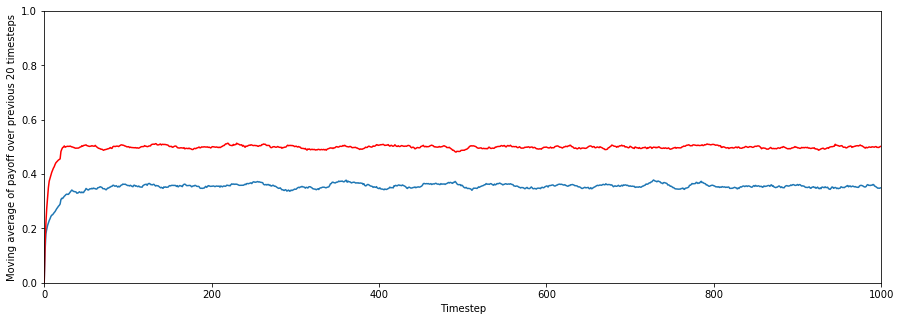

([14.21, 32.07, 953.72, 426.81], [90.01, 289.61, 620.38, 185.06])

In [42]:
####Test Simulations - Automata Thunderdome
AgentsPerGroup = 6
boldness,boldness2 = 0.5,0.5
attentiveness,attentiveness2 = 1,1
fightcoord,fightcoord2 = 1,1
specificpair,specificpair2 = 1,1
mutualdeference,mutualdeference2 = 0.5,0.5
flexibility,flexibility2 = 0,0
winner_loser,winner_loser2 = 0,1
bystander,bystander2 = 0,1
transitive,transitive2 = 0,0
pstring = rule_string((boldness,attentiveness,flexibility,fightcoord,specificpair,mutualdeference,winner_loser,bystander,transitive))
pstring2 = rule_string((boldness2,attentiveness2,flexibility2,fightcoord2,specificpair2,mutualdeference2,winner_loser2,bystander2,transitive2))
eightifiedtuple = []
eightifiedtuple2 = []
for x in range(0,AgentsPerGroup):
    eightifiedtuple.append(pstring)
    eightifiedtuple2.append(pstring2)

simulate_groups_mult(100,1000,0.5,0,0,10,1,eightifiedtuple,eightifiedtuple2,1,makeplot = True,plotwindow = 20)


In [51]:
simulate_group_consensus(1000,0.5,0,5,0,1,eightifiedtuple,1)


(1288, 1210, 2502, 1233, 0.22857142857142856, -0.6612244897959183)

In [47]:
#Sweep 1st Person, 2nd Person, 3rd Person, Boldness
#def simulate_group_mult(iterations,interactions,LS,Flat,CC,det,abil_enh,list_of_automata,stretch)
AgentsPerGroup = 6
attentiveness=1
fightcoord=1
mutualdeference=0.5
flexibility=0
transitive=0
for first in [0,1]:
    for second in [0,1]:
        for third in [0,1]:
            for bold in [0,0.5,1]:                
                pstring = rule_string((bold,attentiveness,flexibility,fightcoord,second,mutualdeference,first,third,transitive))
                eightifiedtuple = []
                for x in range(0,AgentsPerGroup):
                    eightifiedtuple.append(pstring)
                a,b,c,d,e = simulate_group_mult(100,1000,0.5,0,5,0,1,eightifiedtuple,1)
                print(first,'|',second,'|',third,'|',bold,'|',a,'|',b,'|',c,'|',d,'|',e)


0 | 0 | 0 | 0 | 0.0 | 0.0 | 1000.0 | 0.0 | 0.0


KeyboardInterrupt: 

In [54]:
#Sweep 1st Person, 2nd Person, 3rd Person, Boldness, Cost Of Conflict, Determinism of Conflict
#def simulate_group_mult(iterations,interactions,LS,Flat,CC,det,abil_enh,list_of_automata,stretch)
AgentsPerGroup = 6
attentiveness=1
fightcoord=1
mutualdeference=0.5
flexibility=0
transitive=0
for first in [0,1]:
    for second in [0,1]:
        for third in [0,1]:
            for bold in [0,0.5,1]:                
                for conflict_cost in [0,.05,0.1,0.2,0.5,1,2,3,4,5,10]:
                    for conflict_det in [0,.05,0.1,0.2,0.5,1,2,3,4,5,10]:
                        pstring = rule_string((bold,attentiveness,flexibility,fightcoord,second,mutualdeference,first,third,transitive))
                        eightifiedtuple = []
                        for x in range(0,AgentsPerGroup):
                            eightifiedtuple.append(pstring)
                        a,b,c,d,e = simulate_group_mult(1000,1000,0.5,0,conflict_cost,conflict_det,1,eightifiedtuple,1)
                        print(conflict_cost,'|',conflict_det,'|',first,'|',second,'|',third,'|',bold,'|',a,'|',b,'|',c,'|',d,'|',e)


0 | 0 | 0 | 0 | 0 | 0 | 0.0 | 0.0 | 1000.0 | 0.0 | 0.0
0 | 0.05 | 0 | 0 | 0 | 0 | 0.0 | 0.0 | 1000.0 | 0.0 | 0.0
0 | 0.1 | 0 | 0 | 0 | 0 | 0.0 | 0.0 | 1000.0 | 0.0 | 0.0
0 | 0.2 | 0 | 0 | 0 | 0 | 0.0 | 0.0 | 1000.0 | 0.0 | 0.0
0 | 0.5 | 0 | 0 | 0 | 0 | 0.0 | 0.0 | 1000.0 | 0.0 | 0.0
0 | 1 | 0 | 0 | 0 | 0 | 0.0 | 0.0 | 1000.0 | 0.0 | 0.0
0 | 2 | 0 | 0 | 0 | 0 | 0.0 | 0.0 | 1000.0 | 0.0 | 0.0
0 | 3 | 0 | 0 | 0 | 0 | 0.0 | 0.0 | 1000.0 | 0.0 | 0.0
0 | 4 | 0 | 0 | 0 | 0 | 0.0 | 0.0 | 1000.0 | 0.0 | 0.0
0 | 5 | 0 | 0 | 0 | 0 | 0.0 | 0.0 | 1000.0 | 0.0 | 0.0
0 | 10 | 0 | 0 | 0 | 0 | 0.0 | 0.0 | 1000.0 | 0.0 | 0.0
0.05 | 0 | 0 | 0 | 0 | 0 | 0.0 | 0.0 | 1000.0 | 0.0 | 0.0
0.05 | 0.05 | 0 | 0 | 0 | 0 | 0.0 | 0.0 | 1000.0 | 0.0 | 0.0
0.05 | 0.1 | 0 | 0 | 0 | 0 | 0.0 | 0.0 | 1000.0 | 0.0 | 0.0
0.05 | 0.2 | 0 | 0 | 0 | 0 | 0.0 | 0.0 | 1000.0 | 0.0 | 0.0
0.05 | 0.5 | 0 | 0 | 0 | 0 | 0.0 | 0.0 | 1000.0 | 0.0 | 0.0
0.05 | 1 | 0 | 0 | 0 | 0 | 0.0 | 0.0 | 1000.0 | 0.0 | 0.0
0.05 | 2 | 0 | 0 | 0 | 0 | 0

In [73]:
AgentsPerGroup = 6
attentiveness=1
fightcoord=1
mutualdeference=0.5
flexibility=0
transitive=0
for first in [0,1]:
    for second in [0,1]:
        for third in [0,1]:
            for bold in [0,0.5,1]:                
                for conflict_det in [0,.05,0.1,0.2,0.5,1,2,3,4,5,10]:
                    pstring = rule_string((bold,attentiveness,flexibility,fightcoord,second,mutualdeference,first,third,transitive))
                    eightifiedtuple = []
                    for x in range(0,AgentsPerGroup):
                        eightifiedtuple.append(pstring)
                    a,b,c,d,e,f,g = simulate_group_consensus_mult(100,1000,0.5,0,0,conflict_det,1,eightifiedtuple,1)
                    print(conflict_det,'|',first,'|',second,'|',third,'|',bold,'|',a,'|',b,'|',c,'|',d,'|',e,'|',f,'|',g)


0 | 0 | 0 | 0 | 0 | 0.0 | 5000.0 | 0.0 | 0.0 | 0.0 | 0.0 | 0.0
0.05 | 0 | 0 | 0 | 0 | 0.0 | 5000.0 | 0.0 | 0.0 | 0.0 | 0.0 | 0.0
0.1 | 0 | 0 | 0 | 0 | 0.0 | 5000.0 | 0.0 | 0.0 | 0.0 | 0.0 | 0.0
0.2 | 0 | 0 | 0 | 0 | 0.0 | 5000.0 | 0.0 | 0.0 | 0.0 | 0.0 | 0.0
0.5 | 0 | 0 | 0 | 0 | 0.0 | 5000.0 | 0.0 | 0.0 | 0.0 | 0.0 | 0.0
1 | 0 | 0 | 0 | 0 | 0.0 | 5000.0 | 0.0 | 0.0 | 0.0 | 0.0 | 0.0
2 | 0 | 0 | 0 | 0 | 0.0 | 5000.0 | 0.0 | 0.0 | 0.0 | 0.0 | 0.0
3 | 0 | 0 | 0 | 0 | 0.0 | 5000.0 | 0.0 | 0.0 | 0.0 | 0.0 | 0.0
4 | 0 | 0 | 0 | 0 | 0.0 | 5000.0 | 0.0 | 0.0 | 0.0 | 0.0 | 0.0
5 | 0 | 0 | 0 | 0 | 0.0 | 5000.0 | 0.0 | 0.0 | 0.0 | 0.0 | 0.0
10 | 0 | 0 | 0 | 0 | 0.0 | 5000.0 | 0.0 | 0.0 | 0.0 | 0.0 | 0.0
0 | 0 | 0 | 0 | 0.5 | 1253.68 | 1244.77 | 2501.55 | 1247.45 | 0.25133333333333313 | 0.5053333333333334 | 0.26295238095238066
0.05 | 0 | 0 | 0 | 0.5 | 1249.46 | 1246.4 | 2504.14 | 1249.01 | 0.2566666666666664 | 0.5013333333333335 | 0.2628571428571425
0.1 | 0 | 0 | 0 | 0.5 | 1246.25 | 1244.79 | 250

In [14]:
AgentsPerGroup = 6
attentiveness=1
fightcoord=1
mutualdeference=0.5
flexibility=0
transitive=0
for rules in [[1,0,1,0.5],[1,1,1,1],[1,0,1,1],[0,1,0,1]]:
    first = rules[0]
    second = rules[1]
    third = rules[2]
    bold = rules[3]
    for conflict_det in [0,.05,0.1,0.2,0.5,1,2,3,4,5,10]:
        pstring = rule_string((bold,attentiveness,flexibility,fightcoord,second,mutualdeference,first,third,transitive))
        eightifiedtuple = []
        for x in range(0,AgentsPerGroup):
            eightifiedtuple.append(pstring)
        a,b,c,d,e,f,g = simulate_group_consensus_mult(1000,1000,0.5,0,0,conflict_det,1,eightifiedtuple,1)
        print(conflict_det,'|',first,'|',second,'|',third,'|',bold,'|',a,'|',b,'|',c,'|',d,'|',e,'|',f,'|',g)


0 | 1 | 0 | 1 | 0.5 | 0.592 | 0.587 | 4.566 | 2.28 | 0.49 | 1.0 | 0.49642857142857133
0.05 | 1 | 0 | 1 | 0.5 | 0.546 | 0.536 | 4.518 | 2.215 | 0.524 | 1.0 | 0.5044285714285717
0.1 | 1 | 0 | 1 | 0.5 | 0.551 | 0.65 | 4.608 | 2.267 | 0.534 | 1.0 | 0.5148571428571433
0.2 | 1 | 0 | 1 | 0.5 | 0.568 | 0.552 | 4.514 | 2.34 | 0.493 | 1.0 | 0.5052857142857147
0.5 | 1 | 0 | 1 | 0.5 | 0.574 | 0.593 | 4.564 | 2.167 | 0.541 | 1.0 | 0.5109999999999999
1 | 1 | 0 | 1 | 0.5 | 0.558 | 0.599 | 4.581 | 2.164 | 0.528 | 1.0 | 0.5141428571428562
2 | 1 | 0 | 1 | 0.5 | 0.567 | 0.581 | 4.655 | 2.168 | 0.555 | 1.0 | 0.5242857142857137
3 | 1 | 0 | 1 | 0.5 | 0.574 | 0.532 | 4.531 | 2.139 | 0.524 | 1.0 | 0.5089999999999993
4 | 1 | 0 | 1 | 0.5 | 0.565 | 0.576 | 4.561 | 2.197 | 0.509 | 1.0 | 0.5158571428571426
5 | 1 | 0 | 1 | 0.5 | 0.597 | 0.557 | 4.592 | 2.175 | 0.529 | 1.0 | 0.5115714285714279
10 | 1 | 0 | 1 | 0.5 | 0.553 | 0.599 | 4.582 | 2.094 | 0.535 | 1.0 | 0.5119999999999995
0 | 1 | 1 | 1 | 1 | 1.668 | 0.0 | 2.